In [ ]:
from sklearn.neural_network import MLPRegressor
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
!pip install category_encoders scikit_optimize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
import xgboost as xgb
train = pd.read_csv('/content/drive/MyDrive/IDS_dataset/train.csv')     #URN-IDD Dataset
test = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')
val = pd.read_csv('/content/drive/MyDrive/IDS_dataset/val.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')

In [ ]:
df


,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:2,117,15705,15537,113,126,2,278,348,...,3,0,0,0,0,0,6,2350,2265,TCP-SYN
1,of:000000000000000a,Port#:4,349224,14743367,38139845,156153,1430,4,556,560,...,4,0,0,0,0,0,4,649491,649367,Normal
2,of:000000000000000a,Port#:2,127,8855,6316408,271,96,0,0,280,...,2,0,0,0,0,0,6,3933,3848,TCP-SYN
3,of:0000000000000005,Port#:3,1396,25241475,31751210,2853,2172,178,4992757,7565,...,1,0,0,0,0,0,8,10237,10113,Blackhole
4,of:000000000000000a,Port#:1,12,1016,13549,101,101,0,0,556,...,2,0,0,0,0,0,10,6269,6181,TCP-SYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,of:000000000000000c,Port#:1,2314,31679329,6456143,1448,1431,2,278,280,...,5,0,0,0,0,0,8,9372,9162,Diversion
557,of:0000000000000008,Port#:2,5923,101167794,19135198,2378,2116,4,556,556,...,2,0,0,0,0,0,8,17193,17055,Blackhole
558,of:0000000000000001,Port#:1,472,12623572,24419,235,136,2,278,278,...,2,0,0,0,0,0,5,1706,1596,TCP-SYN
559,of:0000000000000005,Port#:3,253,26245,18904,147,156,6,640,640,...,2,0,0,0,0,0,6,5780,5668,TCP-SYN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      561 non-null    object
 1   Port Number                    561 non-null    object
 2   Received Packets               561 non-null    int64 
 3   Received Bytes                 561 non-null    int64 
 4   Sent Bytes                     561 non-null    int64 
 5   Sent Packets                   561 non-null    int64 
 6   Port alive Duration (S)        561 non-null    int64 
 7   Delta Received Packets         561 non-null    int64 
 8   Delta Received Bytes           561 non-null    int64 
 9   Delta Sent Bytes               561 non-null    int64 
 10  Delta Sent Packets             561 non-null    int64 
 11  Delta Port alive Duration (S)  561 non-null    int64 
 12  Connection Point               561 non-null    int64 
 13  Total

In [ ]:
df['Label'].unique()
df['Label'].value_counts()

,count
Label,
TCP-SYN,156
PortScan,127
Blackhole,122
Diversion,90
Normal,49
Overflow,17


<Axes: xlabel='Label'>

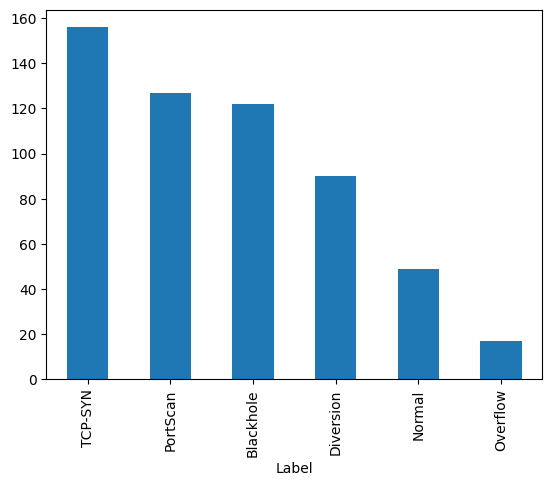

In [ ]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
X_train=train.drop('Label',axis=1)
y_train=train['Label']
X_test=test.drop('Label', axis=1)
y_test=test['Label']
X_val=val.drop('Label',axis=1)
y_val=val['Label']
X_train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,5,1,0,0,0,0,0,4,819,757
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,5,2,0,0,0,0,0,5,1018,918
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,5,2,0,0,0,0,0,8,987400,987276
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,4,3,0,0,0,0,0,8,195879,195780
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,5,1,0,0,0,0,0,4,4524,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,5,4,0,0,0,0,0,6,1563,1469
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,5,3,0,0,0,0,0,4,14774,14647
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,4,2,0,0,0,0,0,8,2688,2590
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,5,2,630355,6303550,630355,6303550,630355,6,3088,2976


In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,240,16586,12622603,467,126,0,0,280,2,5,...,False,False,False,False,False,False,False,False,False,False
1,158,20530,35464,376,171,4,556,3407,43,5,...,False,False,False,False,False,False,False,True,False,False
2,1930,37881404,67857371,414333,1297,0,0,556,4,5,...,False,False,True,False,False,False,False,False,True,False
3,903,18946410,17900326,98088,176,3,320,270280,5002,4,...,False,False,False,False,False,False,False,False,False,True
4,423,29020,19138042,1562,1451,0,0,560,4,5,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,646,18927937,26139,253,151,2,278,278,2,5,...,False,False,True,False,False,False,False,False,False,False
2615,3149,25488846,31784484,3205,2326,4,556,556,4,5,...,False,False,False,False,False,True,False,True,False,False
2616,386,6324623,13285,97,101,27,526635,556,4,4,...,False,False,False,False,False,False,True,False,True,False
2617,807,12638724,25268608,1238,366,47,3379,3939658,105,5,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Received Packets               2619 non-null   int64
 1   Received Bytes                 2619 non-null   int64
 2   Sent Bytes                     2619 non-null   int64
 3   Sent Packets                   2619 non-null   int64
 4   Port alive Duration (S)        2619 non-null   int64
 5   Delta Received Packets         2619 non-null   int64
 6   Delta Received Bytes           2619 non-null   int64
 7   Delta Sent Bytes               2619 non-null   int64
 8   Delta Sent Packets             2619 non-null   int64
 9   Delta Port alive Duration (S)  2619 non-null   int64
 10  Connection Point               2619 non-null   int64
 11  Total Load/Rate                2619 non-null   int64
 12  Total Load/Latest              2619 non-null   int64
 13  Unknown Load/Rate 

Initial Xgboost Classifier Method

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:49:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

   Blackhole       0.93      0.93      0.93       122
   Diversion       0.91      0.93      0.92        90
      Normal       1.00      1.00      1.00        49
    Overflow       1.00      0.35      0.52        17
    PortScan       0.76      0.91      0.82       127
     TCP-SYN       0.89      0.79      0.84       156

    accuracy                           0.88       561
   macro avg       0.91      0.82      0.84       561
weighted avg       0.89      0.88      0.87       561


Overall Accuracy: 0.8770


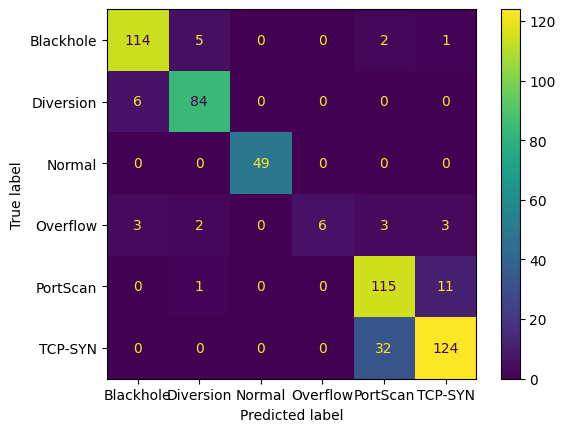

In [ ]:
from xgboost import XGBClassifier
label_encoder =LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

model = xgb.XGBClassifier(booster='gbtree', n_estimators=100, max_depth=5, learning_rate=0.9, use_label_encoder=False,colsample_bytree='0.5', eval_metric='mlogloss',random_state=48,metrics='auc')
model.fit(X_train_numeric,y_train_enc,eval_set=[(X_val_numeric,y_val_enc)],verbose=False)

y_pred = model.predict(X_test_numeric)
y_prob = model.predict_proba(X_test_numeric)[:, 1]
eval_metric= (classification_report (y_test_enc, y_pred, target_names= label_encoder.classes_))
print(eval_metric)
accuracy = accuracy_score(y_test_enc, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred, display_labels=label_encoder.classes_)

Anova Feature Selection

In [ ]:
def anova_feature_selection(X_train,y_train, X_val,y_val, X_test,y_test):
    n_features = X_train.shape[1]
    test_accs = []
    val_accs = []
    models = []

    for k in range(1, n_features + 1):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_k = selector.fit_transform(X_train, y_train)
        X_val_k = selector.transform(X_val)
        X_test_k = selector.transform(X_test)

        new_model = clone(model)
        new_model.fit(X_train_k, y_train)

        val_pred = new_model.predict(X_val_k)
        test_pred = new_model.predict(X_test_k)

        val_accs.append(accuracy_score(y_val, val_pred))
        test_accs.append(accuracy_score(y_test, test_pred))
        models.append((new_model, selector))

    return test_accs, val_accs, models


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:49:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:50:10] WARNING: /workspace/src

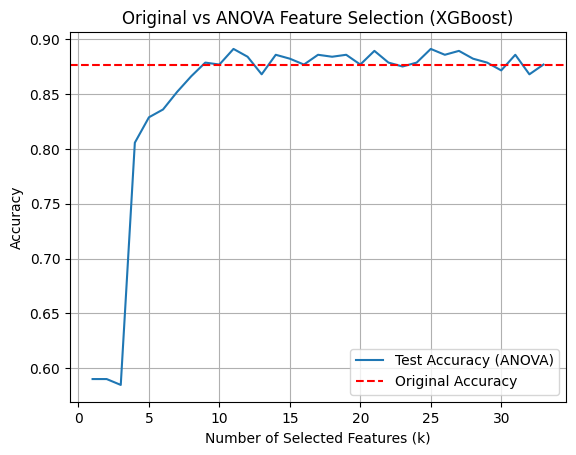

In [ ]:
anova_test_acc, anova_val_acc, anova_models = anova_feature_selection(
    X_train_numeric, y_train_enc,
    X_val_numeric,y_val_enc,
    X_test_numeric, y_test_enc
)

plt.plot(range(1, len(anova_test_acc)+1) ,anova_test_acc, label='Test Accuracy (ANOVA)')
plt.axhline(y=accuracy_score(y_test_enc, model.predict(X_test_numeric)),color='red',linestyle='--' ,label='Original Accuracy')
plt.xlabel("Number of Selected Features (k)" )
plt.ylabel("Accuracy")
plt.title("Original vs ANOVA Feature Selection (XGBoost)" )
plt.legend()
plt.grid(True)
plt.show()

Selected Features: 29
['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets', 'Delta Sent Packets', 'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up', 'Packets Matched', 'Switch ID_of:0000000000000002', 'Switch ID_of:0000000000000003', 'Switch ID_of:0000000000000004', 'Switch ID_of:0000000000000005', 'Switch ID_of:0000000000000006', 'Switch ID_of:0000000000000007', 'Switch ID_of:0000000000000008', 'Switch ID_of:0000000000000009', 'Switch ID_of:000000000000000a', 'Port Number_Port#:2', 'Port Number_Port#:3', 'Port Number_Port#:4']
 Best ANOVA Model Accuracy (k=29): 0.8788

 Classification Report (ANOVA Model):
              precision    recall  f1-score   support

   Blackhole       0.91      0.93      0.92       122
   Diversion       0.91      0.91      0.91        90


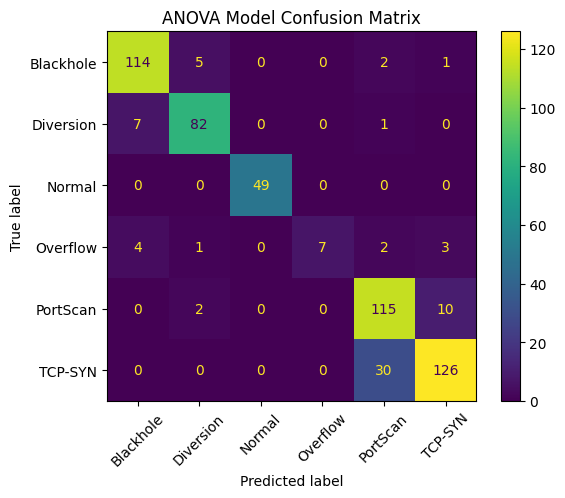

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get best model
best_k_idx = np.argmax(anova_val_acc)
best_model, best_selector =anova_models[best_k_idx]


X_test_best =best_selector.transform(X_test_numeric)
# Predict with best model
y_pred_best = best_model.predict(X_test_best)
selected_features =X_train_numeric.columns[best_selector.get_support()]
print("Selected Features:",(best_k_idx + 1) )
print(selected_features.to_list())

# Accuracy
final_accuracy = accuracy_score(y_test_enc, y_pred_best)
print(f" Best ANOVA Model Accuracy (k={best_k_idx + 1}): {final_accuracy:.4f}\n")

# Classification report
print(" Classification Report (ANOVA Model):")
print(classification_report(y_test_enc,y_pred_best ,target_names=label_encoder.classes_))

# Display confusion matrices
print("\n Confusion Matrix — Best ANOVA Model:")
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_best,display_labels=label_encoder.classes_,xticks_rotation=45)
plt.title("ANOVA Model Confusion Matrix")
plt.show()

